In [42]:
# HIDDEN

from datascience import *
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In this section, we will continue to use the <code><a href="imdb.csv">imdb.csv</a></code> data set.

In [43]:
imdb = Table.read_table('imdb.csv')

Sampling rows of a table
-------------------------

**Deterministic Samples**

When you simply specify which elements of a set you want to choose, without any chances involved, you create a *deterministic sample*.

A determinsitic sample from the rows of a table can be constructed using the `take` method. Its argument is a sequence of integers, and it returns a table containing the corresponding rows of the original table.

The code below returns a table consisting of the rows indexed 3, 18, and 100 in the table `imdb`. Since the original table is sorted by `rank`, which begins at 1, the zero-indexed rows always have a rank that is one greater than the index. However, the `take` method does not inspect the information in the rows to construct its sample.

In [44]:
imdb.take([3, 18, 100]) 

rank,movie,boxoffice,in_millions
4,The Avengers (2012),623279547,623.28
19,Jurassic Park (1993),402348347,402.348
101,My Big Fat Greek Wedding (2002),241437427,241.437


We can select evenly spaced rows by calling `np.arange` and passing the result to `take`. In the example below, we start with the first row (index 0) of `imdb`, and choose every 100th row after that until we reach the end of the table. The expressions `imdb.num_rows` and `len(imdb.rows)` could be used interchangeably to indicate that the range should extend to the end of the table.

In [45]:
imdb.take(np.arange(0, imdb.num_rows, 100))

rank,movie,boxoffice,in_millions
1,Avatar (2009),760505847,760.506
101,My Big Fat Greek Wedding (2002),241437427,241.437
201,Indiana Jones and the Temple of Doom (1984),179870271,179.87
301,X-Men: First Class (2011),146405371,146.405
401,Sweet Home Alabama (2002),127214072,127.214
501,Dr. Dolittle 2 (2001),112950721,112.951
601,Unforgiven (1992),101157447,101.157


Probability Samples
------------------

Much of data science consists of making conclusions based on the data in random samples. Correctly interpreting analyses based on random samples requires data scientists to examine exactly what random samples are.

A *population* is the set of all elements from whom a sample will be drawn.

A *probability sample* is one for which it is possible to calculate, before the sample is drawn, the chance with which any subset of elements will enter the sample.

In a probability sample, all elements need not have the same chance of being chosen. For example, suppose you choose two people from a population that consists of three people A, B, and C, according to the following scheme:

- Person A is chosen with probability 1.
- One of Persons B or C is chosen according to the toss of a coin: if the coin lands heads, you choose B, and if it lands tails you choose C.

This is a probability sample of size 2. Here are the chances of entry for all non-empty subsets:

    A: 1 
    B: 1/2
    C: 1/2
    AB: 1/2
    AC: 1/2
    BC: 0
    ABC: 0

Person A has a higher chance of being selected than Persons B or C; indeed, Person A is certain to be selected. Since these differences are known and quantified, they can be taken into account when working with the sample. 

To draw a probability sample, we need to be able to choose elements according to a process that involves chance. A basic tool for this purpose is a *random number generator*. There are several in Python. Here we will use one that is part of the module `random`, which in turn is part of the module `numpy`. 

The method `randint`, when given two arguments `low` and `high`, returns an integer picked uniformly at random between `low` and `high`, including `low` but excluding `high`. Run the code below several times to see the variability in the integers that are returned.

In [46]:
np.random.randint(3, 8)  # select once at random from 3, 4, 5, 6, 7

4

**A Systematic Sample**

Imagine all the elements of the population listed in a sequence. One method of sampling starts by choosing a random position early in the list, and then evenly spaced positions after that. The sample consists of the elements in those positions. Such a sample is called a *systematic sample*. 

Here we will choose a systematic sample of the rows of `imdb`. We will start by picking one of the first 10 rows at random, and then we will pick every 10th row after that.

In [47]:
"""Choose a random start among rows 0 through 9;
then take every 10th row."""

start = np.random.randint(0, 10)
imdb.take(np.arange(start, imdb.num_rows, 10))

rank,movie,boxoffice,in_millions
1,Avatar (2009),760505847,760.506
11,E.T. the Extra-Terrestrial (1982),434949459,434.949
21,Frozen (2013),400736600,400.737
31,Furious 7 (2015),350034110,350.034
41,Transformers (2007),318759914,318.76
51,Pirates of the Caribbean: The Curse of the Black Pearl ( ...,305388685,305.389
61,The Twilight Saga: Breaking Dawn - Part 2 (2012),292298923,292.299
71,Meet the Fockers (2004),279167575,279.168
81,Captain America: The Winter Soldier (2014),259746958,259.747
91,Night at the Museum (2006),250863268,250.863


Run the code a few times to see how the output varies. Notice how the numbers in the **rank** column all have the same ending digit. That is because the first row has a random index between 0 and 9, and hence a random rank between 1 and 10; then the code just adds 10 successively to each selected row index, leaving the ending digit unchanged.

This systematic sample is a probability sample. To find the chance that a particular row is selected, look at the ending digit in the **rank** column of the row. If that is 7, for example, then the row will be selected if and only if the row corresponding to movie rank 7 (Star Wars) is selected. The chance of that is 1/10. 

In this scheme, all rows do have the same chance of being chosen. But that is not true of other subsets of the rows. Because the selected rows are evenly spaced, most subsets of rows have no chance of being chosen. The only subsets that are possible are those in which all the ranks have the same ending digit. Those are selected with chance 1/10.

**Random sample with replacement**

Some of the simplest probability samples are formed by drawing repeatedly, uniformly at random, from the list of elements of the population. If the draws are made without changing the list between draws, the sample is called a *random sample with replacement*. You can imagine making the first draw at random, replacing the element drawn, and then drawing again.

In a random sample with replacement, each element in the population has the same chance of being drawn, and each can be drawn more than once in the sample.

If you want to draw a sample of people at random to get some information about a population, you might not want to sample with replacement – drawing the same person more than once can lead to a loss of information. But in data science, random samples with replacement arise in two major areas:

* studying probabilities by simulating tosses of a coin, rolls of a die, or gambling games

* creating new samples from a sample at hand

The second of these areas will be covered later in the course. For now, let us study some long-run properties of probabilities.

We will start with the table `die` which contains the numbers of spots on the faces of a die. All the numbers appear exactly once, as we are assuming that the die is fair.

In [48]:
die = Table([[1, 2, 3, 4, 5, 6]],['Face'])
die

Face
1
2
3
4
5
6


Drawing the histogram of this simple set of numbers yields an unsettling figure as `hist` makes a default choice of bins:

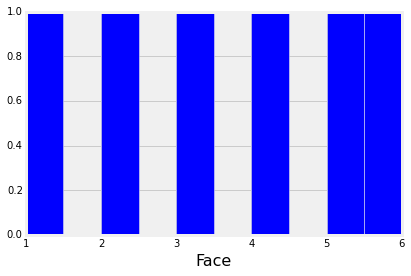

In [49]:
die.hist()

The numbers 1, 2, 3, 4, 5, 6 are integers, so the bins chosen by `hist` only have entries at the edges. In such a situation, it is a better idea to select bins so that they are centered on the integers. This is often true of histograms of data that are *discrete*, that is, variables whose successive values are separated by the same fixed amount. The real advantage of this method of bin selection will become more clear when we start imagining smooth curves drawn over histograms.

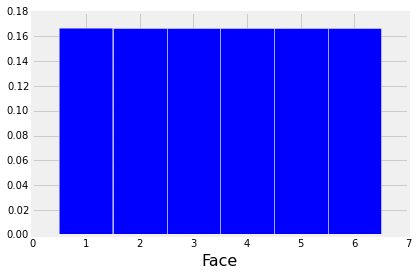

In [50]:
die.hist(bins=np.arange(0.5, 7, 1), normed=True)

Notice how each bin has width 1 and is centered on an integer. Notice also that because the width of each bin is 1, the height of each bar is $0.16666 \ldots /1 = 1/6$, the chance that the corresponding face appears.

The histogram shows the probability with which each face appears. It is called a *probability histogram* of the result of one roll of a die.

The histogram was drawn without rolling any dice or generating any random numbers. We will now use the computer to mimic actually rolling a die. The process of using a computer program to produce the results of a chance experiment is called *simulation*.

To roll the die, we will use a method called `sample`. This method returns a new table consisting of rows selected uniformly at random from a table. Its first argument is the number of rows to be returned. Its second argument is whether or not the sampling should be done with replacement.

The code below simulates 10 rolls of the die. As with all simulations of chance experiments, you should run the code several times and notice the variability in what is returned.

In [51]:
die.sample(10, with_replacement=True)

Face
1
4
4
1
6
6
6
4
4
5


We will now roll the die several times and draw the histogram of the observed results. The histogram of observed results is called an *empirical histogram*.

The results of rolling the die will all be integers in the range 1 through 6, so we will want to use the same bins as we used for the probability histogram. To avoid writing out the same bin argument every time we draw a histogram, let us define a function called `hist_1to6` that will perform the task for us. The function will take one argument: the name of a table that contains the results of the rolls.

In [52]:
def hist_1to6(x):
    return x.hist(bins=np.arange(0.5, 7, 1), normed=True)

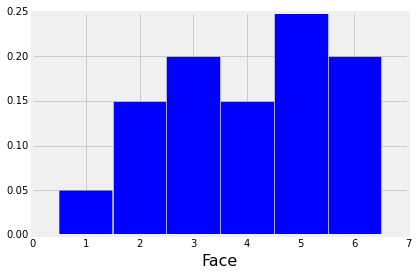

In [53]:
hist_1to6(die.sample(20, with_replacement=True))

Below, for comparison, is the probability histogram for the roll of a die. Based on that, we expect each face to appear about on $1/6$ of the rolls. But if you run the simulation above a few times, you will see that with just 20 rolls, the proportion of times each face appears can be quite far from $1/6$.

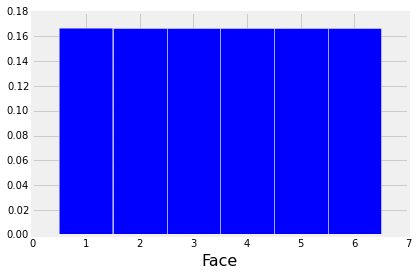

In [54]:
hist_1to6(die)

As we increase the number of rolls in the simulation, the proportions get closer to $1/6$.

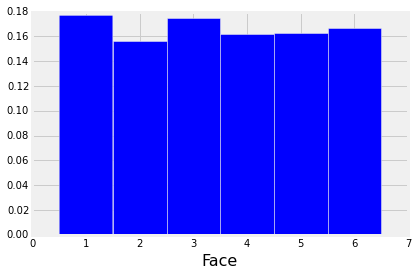

In [55]:
hist_1to6(die.sample(2000, with_replacement=True))

The behavior we have observed is an instance of a general rule.

The Law of Averages
------------------

If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

For example, in the long run, the proportion of times the face with four spots appears gets closer and closer to 1/6.

Here "independently and under identical conditions" means that every repetition is performed in the same way regardless of the results of all the other repetitions.

Convergence of empirical histograms
---------------------------------

We have also observed that a random quantity (such as the number of spots on one roll of a die) is associated with two histograms:

* a probability histogram, that shows all the possible values of the quantity and all their chances

* an empirial histogram, created by simulating the random quantity repeatedly and drawing a histogram of the observed results

We have seen an example of the long-run behavior of empirical histograms:

As the number of repetitions increases, the empirical histogram of a random quantity looks more and more like the probability histogram.

At the Roulette Table
--------------------

Equipped with our new knowledge about the long-run behavior of chances, let us explore a gambling game. Betting on roulette is popular in gambling centers such as Las Vegas and Monte Carlo, and we will simulate one of the bets here.

The main randomizer in roulette in Nevada is a wheel that has 38 pockets on its rim. Two of the pockets are green, eighteen black, and eighteen red. The wheel is on a spindle, and there is a small ball on it. When the wheel is spun, the ball ricochets around and finally comes to rest in one of the pockets. That is declared to be the winning pocket.

You are allowed to bet on several pre-specified collections of pockets. If you bet on "red," you win if the ball comes to rest in one of the red pockets. 

The bet even money. That is, it pays 1 to 1. To understand what that means, assume you are going to bet \$1 on "red." The first thing that happens, even before the wheel is spun, is that you have to hand over your \$1. If the ball lands in a green or black pocket, you never see that dollar again. If the ball lands in a red pocket, you get your dollar back (to bring you back to even), plus another \$1 in winnings.

The table `wheel` represents the pockets of a Nevada roulette wheel. It has 38 rows labeled 1 through 38, one row per pocket. 

In [56]:
pockets = np.arange(1, 39)
colors = (['red', 'black'] * 5 + ['black', 'red'] * 4) * 2 + ['green', 'green']
wheel = Table([pockets, colors],['pocket', 'color'])
wheel

pocket,color
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black
9,red
10,black


The function `bet_on_red` takes a numerical argument `x` and returns the net winnings on a \$1 bet on "red," provided `x` is the number of a pocket.

In [57]:
def bet_on_red(x):
    """The net winnings of betting on red for outcome x."""
    pockets = wheel.where('pocket', x)
    if pockets['color'][0] == 'red':
        return 1
    else:
        return -1

In [58]:
bet_on_red(17)

-1

The function `spins` takes a numerical argument `n` and returns a new table consisting of `n` rows of `wheel` sampled at random with replacement. In other words, it simulates the results of `n` spins of the roulette wheel.

In [59]:
def spins(n):
    return wheel.sample(n, with_replacement=True)

We will create a table called `play` consisting of the results of 10 spins, and add a column that shows the net winnings on \$1 placed on "red." Recall that the `apply` method applies a function to each element in a column of a table.

In [60]:
play = spins(10)
play['winnings'] = play.apply(bet_on_red, 'pocket')
play

pocket,color,winnings
33,black,-1
17,black,-1
12,red,1
30,red,1
7,red,1
12,red,1
16,red,1
7,red,1
24,black,-1
28,black,-1


And here is the net gain on all 10 bets:

In [61]:
sum(play['winnings'])

2

We can put all this together in a single function called `fate_red` that takes as its argument the number of bets and returns the net gain on that many \$1 bets placed on "red." Try running `fate_red` several times with an argument of 500.

In [62]:
def fate_red(n):
    net_gain = sum(spins(n).apply(bet_on_red, 'pocket'))
    if net_gain > 0:
        return 'You made ' + str(net_gain) + " dollars. Lucky!"
    elif net_gain == 0:
        return "Whew! Broke even."
    elif net_gain < 0:
        return 'You made '+ str(net_gain) + " dollars. The casino thanks you for making it richer."

In [63]:
fate_red(500)

'You made -30 dollars. The casino thanks you for making it richer.'

Betting \$1 on red hundreds of times seems like a bad idea from a gambler's perspective. But from the casinos' perspective it is excellent. Casinos rely on large numbers of bets being placed. The payoff odds are set so that the more bets that are placed, the more money the casinos are likely to make, even though a few people are likely to go home with winnings.

**Simple Random Sample – a Random Sample without Replacement**

A random sample without replacement is one in which elements are drawn from a list repeatedly, uniformly at random, at each stage deleting from the list the element that was drawn.

A random sample without replacement is also called a *simple random sample*. All elements of the population have the same chance of entering a simple random sample. All pairs have the same chance as each other, as do all triples, and so on.

The default action of `sample` is to draw without replacement. In card games, cards are almost always dealt without replacement. Let us use `sample` to deal cards from a deck. 

A *standard deck* deck consists of 13 ranks of cards in each of four suits. The suits are called spades, clubs, diamonds, and hearts. The ranks are Ace, 2, 3, 4, 5, 6, 7, 8, 9, 10, Jack, Queen, and King. Spades and clubs are black; diamonds and hearts are red. The Jacks, Queens, and Kings are called 'face cards.'

The table `deck` contains all 52 cards in a column labeled `cards`. The abbreviations are:

Spades: s $~~$ Clubs: c $~~$ Diamonds: d $~~$ Hearts: h

Ace: A $~~$ Jack: J $~~$ Queen: Q $~~$ King: K

In [64]:
from itertools import product

suits = ['♠︎', '♥︎', '♦︎', '♣︎']
ranks = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']

deck = Table.from_rows(product(ranks, suits), ['rank', 'suit'])
deck

rank,suit
A,♠︎
A,♥︎
A,♦︎
A,♣︎
2,♠︎
2,♥︎
2,♦︎
2,♣︎
3,♠︎
3,♥︎


A *poker hand* is five cards dealt at random from the deck. The code below deals a poker hand. Deal a few hands to see if you can get a *flush*: a hand that contains only one suit. How many aces do you typically get?

In [65]:
deck.sample(5)

rank,suit
5,♠︎
Q,♣︎
5,♣︎
9,♥︎
7,♠︎


Note that the hand is the set of five cards, regardless of the order in which they appeared. For example, the hand `['9♣︎', '9♥︎', 'Q♣︎', '7♣︎', '8♥︎']` is the same as the hand `['7♣︎', '9♣︎', '8♥︎', '9♥︎', 'Q♣︎']`. 

This can be used to show that simple random sampling can be thought of in two equivalent ways:

* drawing elements one by one at random without replacement

* randomly permuting (that is, shuffling) the whole list, and then pulling out a set of elements at the same time